In [44]:
import json
with open('summary/summary3.txt', 'r') as f:
    summary = json.load(f)

In [45]:
import pandas as pd
data = pd.DataFrame(summary)
data['T1'] = data['T1'] - 1
data['T2'] = data['T2'] - 1
data.dtypes

t       float64
iter      int64
T1      float64
T2      float64
psi     float64
dtype: object

In [48]:
summary_dict = {}
measures = ['T1', 'T2', 'psi']
for m in measures:
    summary_dict[m] = ['mean', 'std', 'count']

result = data.groupby(['t'], as_index=False).agg(summary_dict)
result

t         T1                        T2                           psi  \
              mean       std count      mean       std count          mean   
0  -4.0  13.679843  0.411791   100  1.771516  0.094221   100  4.811118e-01   
1  -3.6  10.549129  0.276860   100  1.771516  0.094221   100  4.811118e-01   
2  -3.2   7.911439  0.177722   100  1.771516  0.094221   100  4.811118e-01   
3  -2.8   5.740629  0.106130   100  1.771516  0.094221   100  4.811118e-01   
4  -2.4   4.030603  0.058241   100  1.771516  0.094221   100  4.811118e-01   
5  -2.0   2.783237  0.029827   100  1.799169  0.096805   100  4.001524e-01   
6  -1.6   1.956005  0.014335   100  1.564216  0.085626   100  4.001524e-01   
7  -1.2   1.456575  0.006135   100  1.268432  0.051657   100  4.001524e-01   
8  -0.8   1.178804  0.002106   100  1.305429  0.054908   100  1.323325e-01   
9  -0.4   1.041366  0.000428   100  1.151779  0.039117   100  1.323325e-01   
10  0.0   1.000000  0.000000   100  1.000000  0.000000   100 -2.026102e-09   
11  0.4   1.041343  0.000393   100  1.152766  0.039838   100  1.405074e-01   
12  0.8   1.178605  0.001832   100  1.305469  0.056544   100  1.405074e-01   
13  1.2   1.455879  0.005331   100  1.275726  0.064844   100  4.218004e-01   
14  1.6   1.954505  0.013216   100  1.574917  0.100087   100  4.218004e-01   
15  2.0   2.781342  0.030492   100  1.815464  0.118835   100  4.218004e-01   
16  2.4   4.030354  0.065677   100  1.787705  0.111532   100  4.865284e-01   
17  2.8   5.745475  0.128220    99  1.787044  0.111902    99  4.862922e-01   
18  3.2   7.928602  0.222125   100  1.787705  0.111532   100  4.865284e-01   
19  3.6  10.585985  0.354199   100  1.787705  0.111532   100  4.865284e-01   
20  4.0  13.745857  0.533284   100  1.787705  0.111532   100  4.865284e-01   

                        
             std count  
0   3.147009e-02   100  
1   3.147009e-02   100  
2   3.147009e-02   100  
3   3.147009e-02   100  
4   3.147009e-02   100  
5   3.010597e-02   100  
6   3.010597e-02   100  
7   3.010597e-02   100  
8   2.423518e-02   100  
9   2.423518e-02   100  
10  5.088359e-10   100  
11  2.244294e-02   100  
12  2.244294e-02   100  
13  3.354169e-02   100  
14  3.354169e-02   100  
15  3.354169e-02   100  
16  3.549100e-02   100  
17  3.559252e-02    99  
18  3.549100e-02   100  
19  3.549100e-02   100  
20  3.549100e-02   100

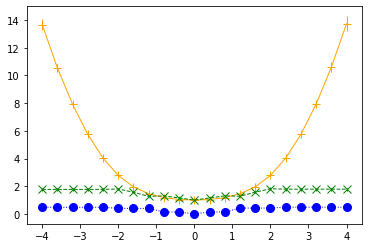

In [53]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cols = ['orange', 'green', 'blue']
markers = ['+', 'x', 'o']
ltys = ['-', '--', ':']
tests = ['T1', 'T2', 'psi']
test_names = tests

for c, mk, lty, t, tn in zip(cols, markers, ltys, tests, test_names):
    x = result['t']
    mean, std = result[t]['mean'], result[t]['std']
    plt.errorbar(x, mean, std, color = c, linestyle = lty,\
                marker = mk, markersize = 8, lw = 1, alpha = 1)
    #plt.yscale('log')



In [ ]:
x1 = np.random.binomial(d, 0.5, size = (n, 1))
x2 = np.random.binomial(1, 0.5, size = (n, 1))
x = np.concatenate((x1, x2), axis = 1)

b = np.array([[1, 0]])
p = 1/(1 + np.exp(- x @ b.T + d/2)).reshape((-1,))
y = np.random.binomial(1, p, size = (n, ))

In [42]:
import numpy as np
n = 1000
y = np.random.binomial(1, 0.5, size = (n, 1))
g = np.random.binomial(1, 0.05, size = (n, 1))
x0 = np.random.binomial(4, 0.5, size = (n, 1))/8 * (2 * y - 1) * (2 * g - 1) + 1.5 * (2 * g - 1)
x1 = np.random.binomial(10, 0.5, size = (n, 1)) - 10/2
x = np.concatenate((x0, x1), axis = 1)
x.shape

(1000, 2)

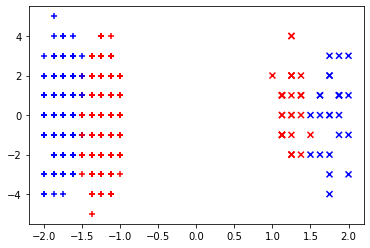

In [43]:
import matplotlib.pyplot as plt
y = y.reshape((-1,))
g = g.reshape((-1,))
colors = ['red', 'blue']
markers = ['+', 'x']
col = np.array([colors[_] for _ in list(y)], dtype = 'str')
# mark = [markers[_] for _ in list(g.reshape((-1,)))]
plt.scatter(x0[g == 0], x1[g == 0], color = col[g ==0], marker=markers[0])
plt.scatter(x0[g == 1], x1[g == 1], color = col[g==1], marker=markers[1])

In [36]:
import itertools
ITER = 100
theta2 = [(0.4 * _ - 4) for _ in range(21)]

pars = list(itertools.product(range(ITER), theta2))
len(pars)

2100

In [41]:
pars[10]

(0, 0.0)